<a href="https://colab.research.google.com/github/CesarRC7/Simulaci-n-I/blob/main/Metodo_MC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimación de la integral de f(x) en [0, 1] con 1000000 puntos: 0.6295746214446143
Valor exacto de la integral: 0.6298233442079734
Error en la estimación: 0.00024872276335907717


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


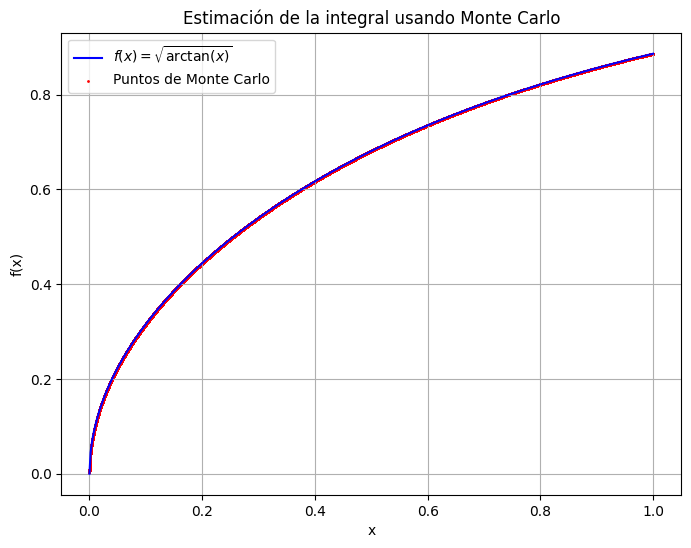

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Definimos la función: f(x) = sqrt(arctan(x))
def f(x):
    return np.sqrt(np.arctan(x))

def monte_carlo_integral(f, a, b, n):
    """
    Estima la integral de una función 'f' en el intervalo [a, b] usando el método de Monte Carlo Crudo.

    Parámetros:
    f (función): la función a integrar
    a (float): límite inferior del intervalo
    b (float): límite superior del intervalo
    n (int): número de puntos aleatorios a generar

    Retorna:
    integral_estimada (float): valor estimado de la integral
    """
    # Generar 'n' puntos aleatorios en el intervalo [a, b]
    x_random = np.random.uniform(a, b, n)

    # Evaluamos la funcion en estos puntos
    f_values = f(x_random)

    # Estimación de la integral
    integral_estimada = (b - a) * np.mean(f_values)

    return integral_estimada, x_random, f_values

def integral_exacta(a, b):
    """
    Calcula el valor exacto de la integral de la función f(x) = sqrt(arctan(x)) en el intervalo [a, b]

    Parámetros:
    a (float): límite inferior del intervalo
    b (float): límite superior del intervalo

    Retorna:
    integral_exacta (float): valor exacto de la integral
    """
    integral_exacta, _ = quad(f, a, b)
    return integral_exacta

# Intervalo de integración
a = 0
b = 1

# Numero aleatorio a generar
n = 1000000

# Aqui calculamos la integral
integral_estimacion, x_random, f_values = monte_carlo_integral(f, a, b, n)

# Valor exacto de la integral
valor_exacto = integral_exacta(a, b)

# Error de la estimación
error = abs(integral_estimacion - valor_exacto)

# Resultado
print(f"Estimación de la integral de f(x) en [{a}, {b}] con {n} puntos: {integral_estimacion}")
print(f"Valor exacto de la integral: {valor_exacto}")
print(f"Error en la estimación: {error}")

# Graficamos la función y los puntos de Monte Carlo
x_values = np.linspace(a, b, 500)
y_values = f(x_values)

plt.figure(figsize=(8, 6))

# Graficamos la función
plt.plot(x_values, y_values, label=r'$f(x) = \sqrt{\arctan(x)}$', color='blue')

# Graficamos los puntos
plt.scatter(x_random, f_values, color='red', s=1, label='Puntos de Monte Carlo')

plt.title('Estimación de la integral usando Monte Carlo')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Ver grafica
plt.show()
